Basic Statistics:
       discounted_price   actual_price  discount_percentage       rating  \
count       1464.000000    1464.000000          1464.000000  1464.000000   
mean        3126.011906    5447.002923            47.713115     4.096585   
std         6946.625442   10878.270001            21.627422     0.291674   
min           39.000000      39.000000             0.000000     2.000000   
25%          323.750000     800.000000            32.000000     4.000000   
50%          799.000000    1650.000000            50.000000     4.100000   
75%         1999.000000    4303.750000            63.000000     4.300000   
max        77990.000000  139900.000000            94.000000     5.000000   

        rating_count  
count    1464.000000  
mean    18282.366803  
std     42742.207636  
min         0.000000  
25%      1179.000000  
50%      5178.500000  
75%     17330.750000  
max    426973.000000  


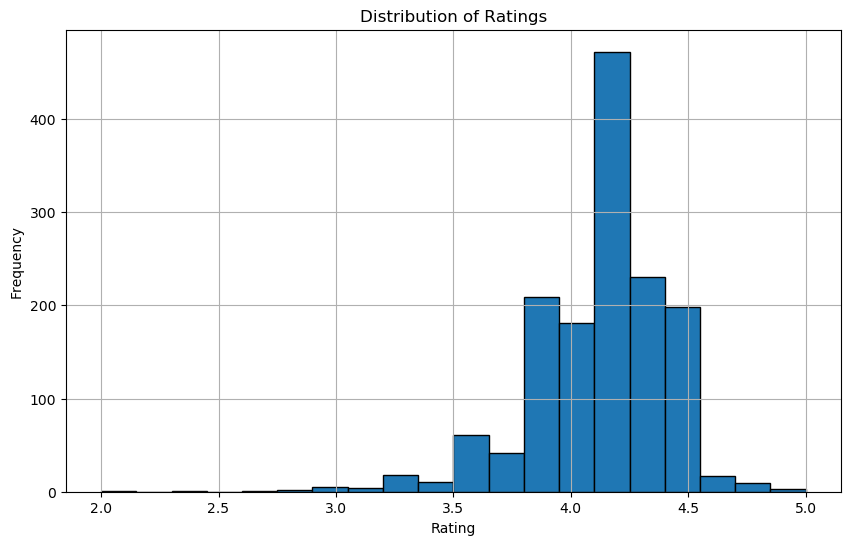

Top 5 Products with the Highest Number of Ratings:
                                          product_name  rating_count  rating
12   AmazonBasics Flexible Premium HDMI Cable (Blac...        426973     4.4
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...        426973     4.4
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...        426973     4.4
684  AmazonBasics Flexible Premium HDMI Cable (Blac...        426972     4.4
352  boAt Bassheads 100 in Ear Wired Earphones with...        363713     4.1
Average Discount Percentage by Category:
main_category
HomeImprovement          57.500000
Computers&Accessories    54.024283
Health&PersonalCare      53.000000
Electronics              50.828897
MusicalInstruments       46.000000
Car&Motorbike            42.000000
Home&Kitchen             40.174497
OfficeProducts           12.354839
Toys&Games                0.000000
Name: discount_percentage, dtype: float64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'C:\\Users\\renug\\OneDrive\\Desktop\\data\\amazon.csv'
data = pd.read_csv(file_path)


data = data[~data['rating'].str.contains('|', regex=False)]


data['discounted_price'] = data['discounted_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
data['actual_price'] = data['actual_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
data['rating'] = data['rating'].astype(float)


data['rating_count'] = data['rating_count'].replace({',': ''}, regex=True)
data['rating_count'] = data['rating_count'].fillna(0).astype(int)
data['discount_percentage'] = data['discount_percentage'].replace({'%': ''}, regex=True)
data['discount_percentage'] = data['discount_percentage'].fillna(0).astype(float)


basic_stats = data.describe()
print("Basic Statistics:")
print(basic_stats)


plt.figure(figsize=(10, 6))
data['rating'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


top_rated_products = data.nlargest(5, 'rating_count')[['product_name', 'rating_count', 'rating']]
print("Top 5 Products with the Highest Number of Ratings:")
print(top_rated_products)


data['main_category'] = data['category'].str.split('|').str[0]


avg_discount_by_category = data.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False)
print("Average Discount Percentage by Category:")
print(avg_discount_by_category)
